In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import censusdata
import numpy as np

# Module 1: Data Exploration

## 1. Ridesharing Data

In [2]:
# Exploring a 100,000 row subset of the larger dataset
mini_df = pd.read_csv("data/100ksample.csv", index_col=0)

In [3]:
mini_df.head(5)

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,tip%
1,cdebd83a2734197134ab7271b560a76db7463a22,01/24/2019 07:45:00 PM,01/24/2019 08:15:00 PM,1452,6.0,17031842200,17031060900,8,6,12.5,0,2.55,15.05,0,1,41.904935,-87.649907,41.949829,-87.643965,0.000000
2,cd405fdcf9c1583561ec6022546bf84f76193a23,12/14/2018 06:30:00 PM,12/14/2018 07:00:00 PM,970,2.2,17031842200,17031242300,8,24,15.0,3,2.50,20.50,0,1,41.904935,-87.649907,41.899507,-87.679600,0.146341
3,cb6d49a88ddefa4f5f44de68f18d3fd447eb0296,01/24/2019 05:45:00 PM,01/24/2019 06:00:00 PM,600,1.2,17031081700,17031080201,8,8,5.0,0,0.67,5.67,1,4,41.892042,-87.631864,41.909496,-87.630964,0.000000
4,ceaa557cf0a4b5f7ed09c40a4a162a8ce37aa47b,02/09/2019 12:00:00 AM,02/09/2019 12:00:00 AM,534,4.7,17031080300,17031031400,8,3,7.5,0,2.55,10.05,1,1,41.907492,-87.635760,41.962179,-87.645379,0.000000
5,ca32c22316c27b9633798aa4b5019009acde6257,01/31/2019 07:30:00 PM,01/31/2019 07:30:00 PM,513,1.6,17031241600,17031243300,24,24,5.0,0,2.55,7.55,0,1,41.906651,-87.665338,41.892493,-87.664746,0.000000


In [4]:
# Converting data types
mini_df = mini_df.astype({'trip_id' : str,
                          'trip_start_timestamp' : 'datetime64[ns]',
                          'trip_end_timestamp' : 'datetime64[ns]',
                          'trip_seconds': int,
                          'trip_miles': float,
                          'pickup_community_area': str,
                          'dropoff_community_area': str,
                          'pickup_census_tract' : str,
                          'dropoff_census_tract' : str,
                          'fare' : float,
                          'tip' : float,
                          'additional_charges': float,
                          'trip_total': float,
                          'shared_trip_authorized': bool,
                          'trips_pooled': int})
mini_df.info()
print('''\n The first observation in the data is from {} and the 
         last observation is from {}.'''.format(mini_df["trip_start_timestamp"].min(), 
                                                mini_df["trip_end_timestamp"].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     100000 non-null  object        
 1   trip_start_timestamp        100000 non-null  datetime64[ns]
 2   trip_end_timestamp          100000 non-null  datetime64[ns]
 3   trip_seconds                100000 non-null  int64         
 4   trip_miles                  100000 non-null  float64       
 5   pickup_census_tract         100000 non-null  object        
 6   dropoff_census_tract        100000 non-null  object        
 7   pickup_community_area       100000 non-null  object        
 8   dropoff_community_area      100000 non-null  object        
 9   fare                        100000 non-null  float64       
 10  tip                         100000 non-null  float64       
 11  additional_charges          100000 non-

In [5]:
# Summary statistics
mini_df.describe()

,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,tip%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,937.087520,4.392820,9.277500,0.504060,2.590154,12.371714,1.326890,41.899264,-87.657431,41.899751,-87.658562,0.032284
std,641.677478,4.392251,6.952543,1.359648,1.649026,8.447769,0.816063,0.048367,0.049288,0.048541,0.052369,0.075603
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.903040,41.650222,-87.903040,0.000000
25%,490.000000,1.500000,5.000000,0.000000,2.550000,7.550000,1.000000,41.880994,-87.670966,41.880994,-87.671110,0.000000
50%,777.000000,2.900000,7.500000,0.000000,2.550000,10.050000,1.000000,41.895033,-87.646293,41.895033,-87.646007,0.000000
75%,1197.000000,5.500000,10.000000,0.000000,2.550000,14.550000,1.000000,41.928946,-87.631407,41.929047,-87.631407,0.000000
max,14760.000000,91.500000,130.000000,50.000000,16.340000,157.580000,12.000000,42.021224,-87.535285,42.021224,-87.535285,0.725953


In [6]:
# Create new variables 
mini_df['date'] = mini_df['trip_start_timestamp'].dt.normalize()
mini_df['trip_start_month'] = mini_df['date'].dt.month
mini_df['trip_start_weekday'] = mini_df.trip_start_timestamp.dt.dayofweek 
mini_df['trip_start_hour'] = mini_df.trip_start_timestamp.dt.hour

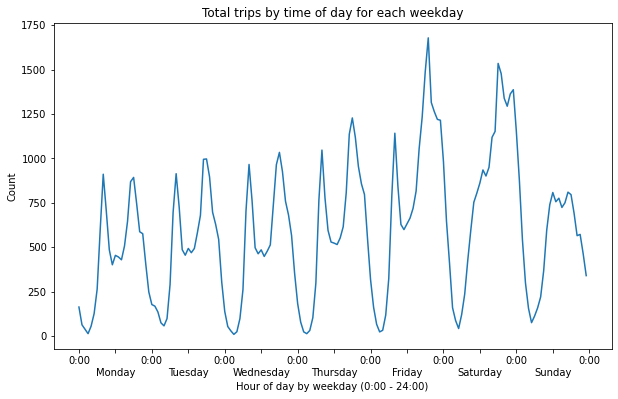

In [7]:
grouped = mini_df.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_id"].count()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Count")
plt.title("Total trips by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

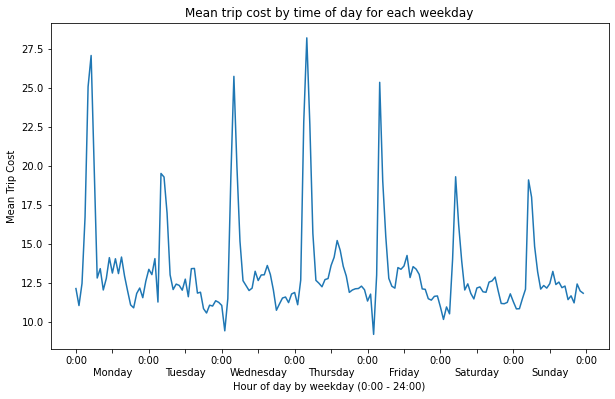

In [8]:
grouped = mini_df.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_total"].mean()

fig, ax = plt.subplots()
fig = grouped.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Mean Trip Cost")
plt.title("Mean trip cost by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

## 2. Census Data

In [26]:
acs = gpd.read_file("data/acs/final_acs.shp")
acs.head(5)

,GEO_ID,name10,med_income,perc_black,perc_white,tot_pop,tot_black,tot_white,geometry
0,1500000US170314607002,Block 2005,37571.0,26.113861,55.569307,808,211,449,"POLYGON ((-87.55480 41.73369, -87.55522 41.733..."
1,1500000US170314607003,Block 3000,22292.0,46.186441,44.915254,472,218,212,"POLYGON ((-87.55485 41.73551, -87.55526 41.735..."
2,1500000US170314910004,Block 4014,45250.0,98.889615,0.195950,1531,1514,3,"POLYGON ((-87.62326 41.69805, -87.62325 41.697..."
3,1500000US170314910002,Block 2033,22206.0,100.000000,0.000000,1067,1067,0,"POLYGON ((-87.62313 41.69350, -87.62313 41.693..."
4,1500000US170314910005,Block 5001,20594.0,98.812849,1.187151,1432,1415,17,"POLYGON ((-87.62797 41.69526, -87.62796 41.695..."


## 3. Merging Datasets

In [49]:
gdf = gpd.GeoDataFrame(mini_df, geometry=gpd.points_from_xy(mini_df.pickup_centroid_longitude, 
                                                            mini_df.pickup_centroid_latitude), crs="EPSG:4326")

# Joining census and acs census datasets based on the customers' pickup location
# Michelle, I believe this is the one we can use for modeling purposes.
gdf_acs = gpd.sjoin(gdf, acs, op="within")

In [50]:
ride_count = gdf_acs.groupby('GEO_ID')["trip_id"].count().to_frame('total_trips').reset_index()
vars_by_census_tract = acs.merge(ride_count, on="GEO_ID", how="outer")
vars_by_census_tract["total_trips"] = vars_by_census_tract["total_trips"].fillna(0)

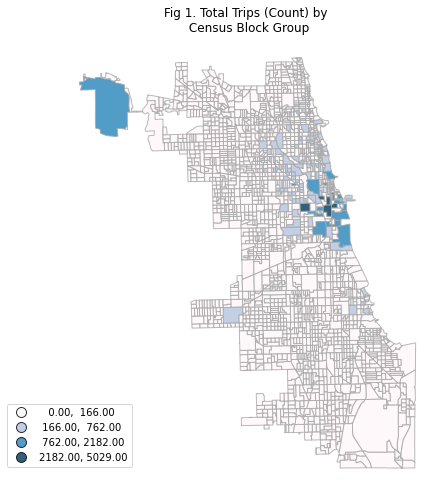

In [51]:
fig = vars_by_census_tract.plot(column='total_trips',
                        cmap = 'PuBu',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 1. Total Trips (Count) by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [52]:
pooled_trips = gdf_acs.groupby('GEO_ID')['shared_trip_authorized'].mean().to_frame('avg_shared_trips').reset_index()
pooled_trips["avg_shared_trips"] = pooled_trips["avg_shared_trips"] * 100
vars_by_census_tract = acs.merge(pooled_trips, on="GEO_ID", how="outer")
vars_by_census_tract["avg_shared_trips"] = vars_by_census_tract["avg_shared_trips"].fillna(0)

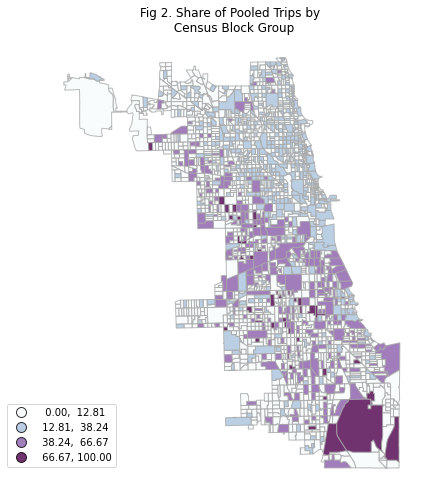

In [53]:
fig = vars_by_census_tract.plot(column='avg_shared_trips',
                        cmap = 'BuPu',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 2. Share of Pooled Trips by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [54]:
avg_cost = gdf_acs.groupby('GEO_ID')['trip_total'].mean().to_frame('avg_trip_cost').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_cost, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_cost'] = vars_by_census_tract['avg_trip_cost'].fillna(0)

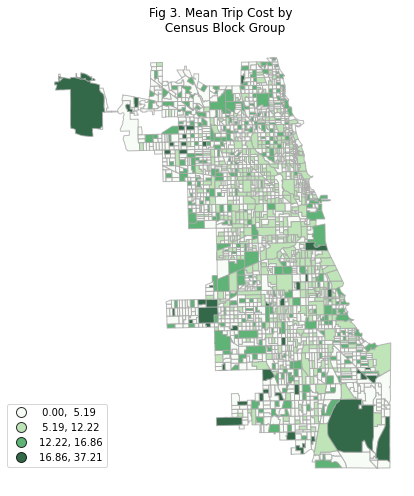

In [55]:
fig = vars_by_census_tract.plot(column='avg_trip_cost',
                        cmap = 'Greens',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 3. Mean Trip Cost by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [56]:
avg_miles = gdf_acs.groupby('GEO_ID')['trip_miles'].mean().to_frame('avg_trip_miles').reset_index()
vars_by_census_tract = vars_by_census_tract.merge(avg_miles, on="GEO_ID", how="outer")
vars_by_census_tract['avg_trip_miles'] = vars_by_census_tract['avg_trip_miles'].fillna(0)

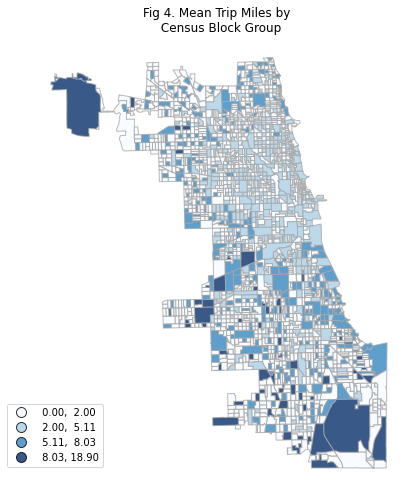

In [57]:
fig = vars_by_census_tract.plot(column='avg_trip_miles',
                        cmap = 'Blues',
                        figsize=(11,7),   
                        scheme='natural_breaks', k=4, 
                        legend = True,
                        edgecolor='darkgrey',
                        alpha=0.8)
fig.set_title('Fig 4. Mean Trip Miles by \n Census Block Group', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

# Module 2: Models